<a href="https://colab.research.google.com/github/Anuragluckshetty/CODSOFT/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anuragluckshetty
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset


100%|██████████| 211k/211k [00:00<00:00, 235MB/s]

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [5]:
df=pd.read_csv("/content/sms-spam-collection-dataset/spam.csv",encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

print(df.isnull().sum())


label      0
message    0
dtype: int64


In [7]:
X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [8]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)

print("Naive Bayes:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [9]:
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)

print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



In [10]:
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)

print("SVM:")
print(classification_report(y_test, y_pred_svm))


SVM:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [11]:
print("Accuracy Scores:")
print("Naive Bayes:", accuracy_score(y_test, y_pred_nb))
print("Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print("SVM:", accuracy_score(y_test, y_pred_svm))


Accuracy Scores:
Naive Bayes: 0.9668161434977578
Logistic Regression: 0.9524663677130045
SVM: 0.97847533632287


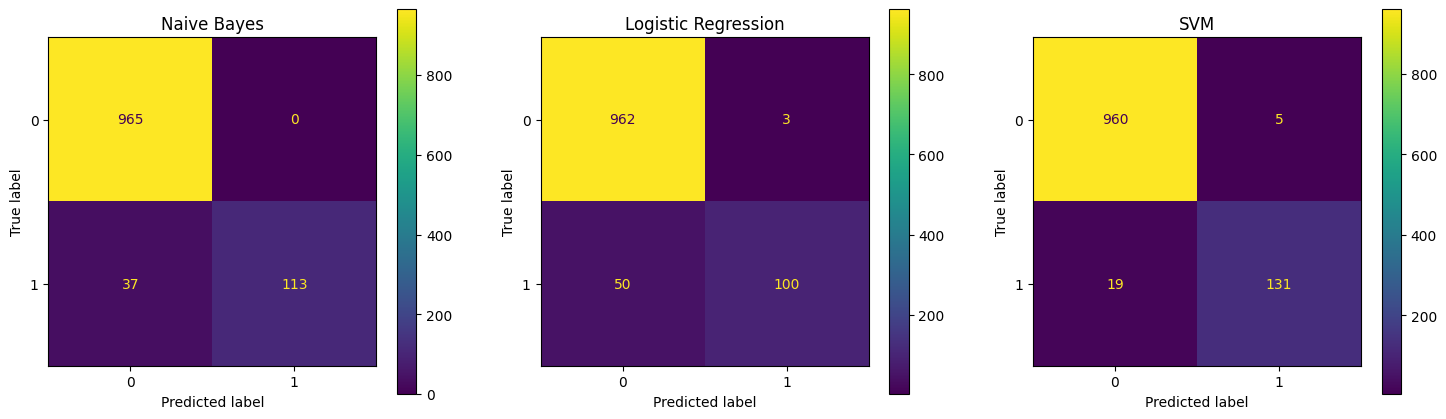

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

models = [("Naive Bayes", y_pred_nb),
          ("Logistic Regression", y_pred_lr),
          ("SVM", y_pred_svm)]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, preds) in enumerate(models):
    ConfusionMatrixDisplay.from_predictions(y_test, preds, ax=axes[i])
    axes[i].set_title(name)

plt.show()
